In [1]:
%matplotlib inline
import sys
sys.path.append("../")
import numpy
from matplotlib import pyplot
from rl_book_gym.envs.blackjack import Env, Action, Reward

In [2]:
def fixed_policy(score, stick_score=20):
    return Action.hit if score < stick_score else Action.stick


def visit_value(policy, n_episode=100000, first=True):
    env = Env()
    averaged_value_dict = dict()
    count_value_dict = dict()
    for epi in range(n_episode):
        env.reset()
        value_dict = dict()
        obs, reward, done, _ = env.step(Action.hit)
        state_list = []
        while not done:
            usable_ace = (1 in obs["player_card"]) and sum(obs["player_card"]) < 12
            state_list.append((usable_ace, obs["dealer_card"][0], obs["player_score"]))
            score = obs["player_score"]
            obs, reward, done, _ = env.step(policy(score))

        for i, state in enumerate(state_list):
            if state not in value_dict:
                value_dict[state] = reward
            elif not first:
                # every-visit
                value_dict[state] = (reward + i * value_dict[state]) / (i + 1)
                
        for state, value in value_dict.items():
            if state in averaged_value_dict:
                j, v = count_value_dict[state], averaged_value_dict[state]
                averaged_value_dict[state] = (value + j * v) / (j + 1)
                count_value_dict[state] += 1
            else:
                averaged_value_dict[state] = value
                count_value_dict[state] = 1
    return averaged_value_dict


def plot_value_dict(d):
    ace = numpy.zeros((10, 10))
    noace = numpy.zeros((10, 10))
    for (usable, dcard, pscore), value in d.items():
        a = ace if usable else noace
        if 12 <= pscore <= 21:
            a[dcard-1, pscore - 12] = value

    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    fig = pyplot.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 2, 1, projection="3d")
    ax.set_title("usable ace")
    x, y = numpy.meshgrid(numpy.arange(1, 11), numpy.arange(12, 22))
    srf = ax.plot_surface(x, y, ace.T, cmap=cm.coolwarm, antialiased=False)

    ax = fig.add_subplot(1, 2, 2, projection="3d")
    ax.set_title("no usable ace")
    x, y = numpy.meshgrid(numpy.arange(1, 11), numpy.arange(12, 22))
    srf = ax.plot_surface(x, y, noace.T, cmap=cm.coolwarm, antialiased=False)
    # fig.colorbar(srf)

first-visit MC


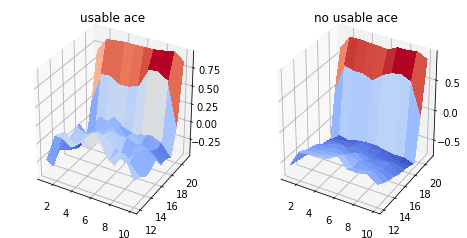

In [3]:
print("first-visit MC")
d = visit_value(fixed_policy, first=True)
plot_value_dict(d)

every-visit MC


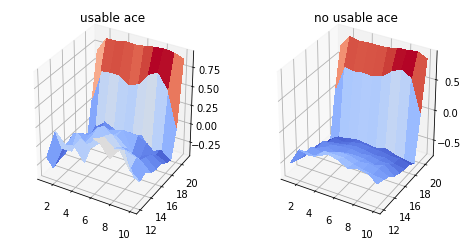

In [4]:
print("every-visit MC")
d = visit_value(fixed_policy, first=True)
plot_value_dict(d)